# S&P 500 Forecasting Project - Data Exploration

This notebook explores the historical S&P 500 index data, performs initial data analysis, and prepares the data for modeling.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../'))

# Import project modules
from src.data_utils import load_sp500_data, calculate_returns, train_test_split, plot_time_series

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 2. Load and Inspect S&P 500 Data

In [2]:
# Load the S&P 500 data
data_path = '../data/HistoricalData_1740743587727.csv'
sp500_data = load_sp500_data(data_path)

# Display the first few rows
print(f"Data shape: {sp500_data.shape}")
sp500_data.head()

Data shape: (2521, 4)


,Close/Last,Open,High,Low
Date,,,,
2015-03-02,2117.39,2105.23,2117.52,2104.50
2015-03-03,2107.78,2115.76,2115.76,2098.26
2015-03-04,2098.53,2107.72,2107.72,2087.62
2015-03-05,2101.04,2098.54,2104.25,2095.22
2015-03-06,2071.26,2100.91,2100.91,2067.27


In [3]:
# Display basic information about the dataset
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2521 entries, 2015-03-02 to 2025-02-27
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2521 non-null   float64
 1   Open        2521 non-null   float64
 2   High        2521 non-null   float64
 3   Low         2521 non-null   float64
dtypes: float64(4)
memory usage: 98.5 KB


In [4]:
# Display summary statistics
sp500_data.describe()

,Close/Last,Open,High,Low
count,2521.000000,2521.000000,2521.000000,2521.000000
mean,3413.170420,3407.853459,3425.852190,3388.379012
std,1119.528608,1129.806456,1135.300436,1123.947611
min,1829.080000,0.000000,0.000000,0.000000
25%,2464.610000,2462.650000,2469.640000,2446.550000
50%,3085.180000,3080.800000,3097.070000,3065.890000
75%,4273.530000,4268.690000,4292.140000,4232.250000
max,6144.150000,6134.500000,6147.430000,6111.150000


## 3. Data Visualization

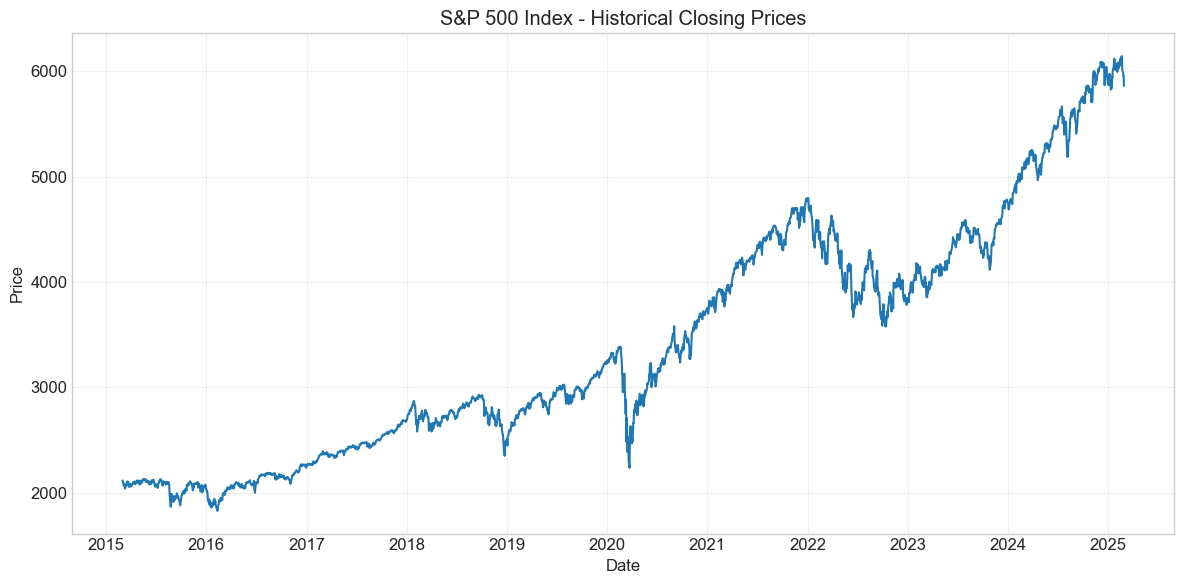

In [5]:
# Plot S&P 500 closing prices
fig = plot_time_series(sp500_data, column='Close/Last', title='S&P 500 Index - Historical Closing Prices')

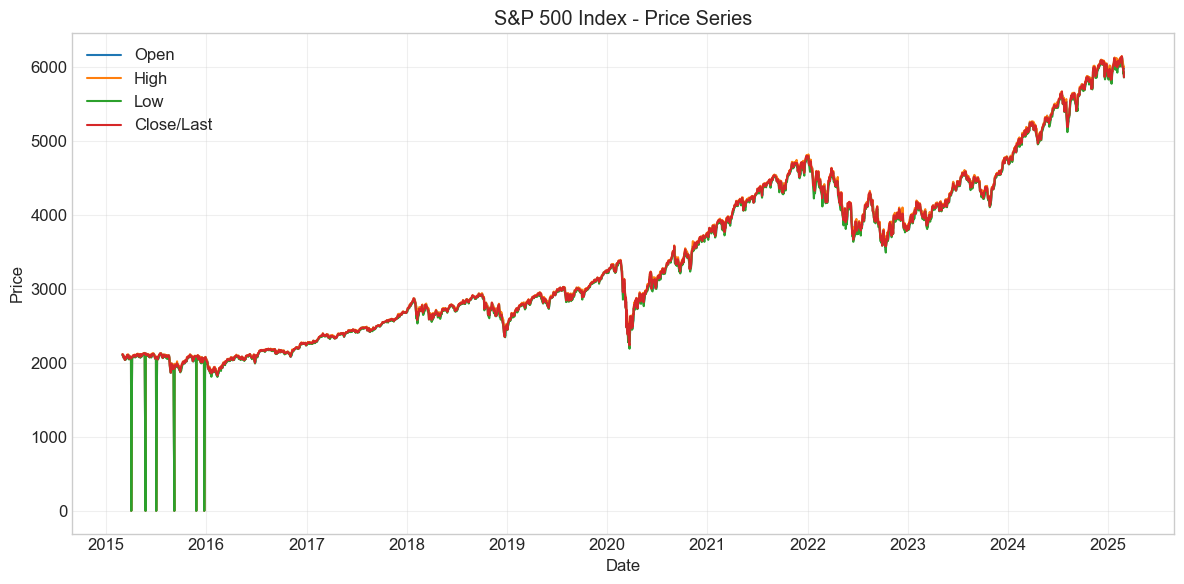

In [6]:
# Plot all price series (Open, High, Low, Close)
fig, ax = plt.subplots(figsize=(12, 6))
for column in ['Open', 'High', 'Low', 'Close/Last']:
    ax.plot(sp500_data.index, sp500_data[column], label=column)
ax.set_title('S&P 500 Index - Price Series')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()

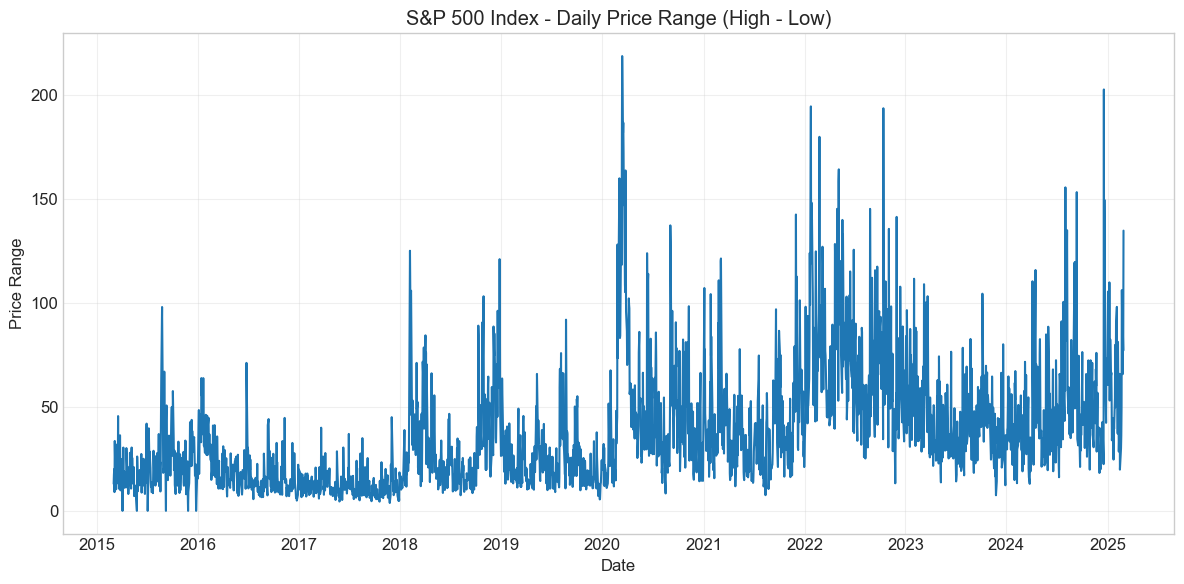

In [7]:
# Calculate daily price range (High - Low)
sp500_data['Daily_Range'] = sp500_data['High'] - sp500_data['Low']

# Plot daily price range
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sp500_data.index, sp500_data['Daily_Range'])
ax.set_title('S&P 500 Index - Daily Price Range (High - Low)')
ax.set_xlabel('Date')
ax.set_ylabel('Price Range')
ax.grid(True, alpha=0.3)
plt.tight_layout()

## 4. Calculate Returns

In [8]:
# Calculate daily returns
sp500_data = calculate_returns(sp500_data, column='Close/Last')

# Display the first few rows with returns
sp500_data[['Close/Last', 'Returns']].head()

,Close/Last,Returns
Date,,
2015-03-02,2117.39,NaN
2015-03-03,2107.78,-0.453861
2015-03-04,2098.53,-0.438850
2015-03-05,2101.04,0.119608
2015-03-06,2071.26,-1.417393


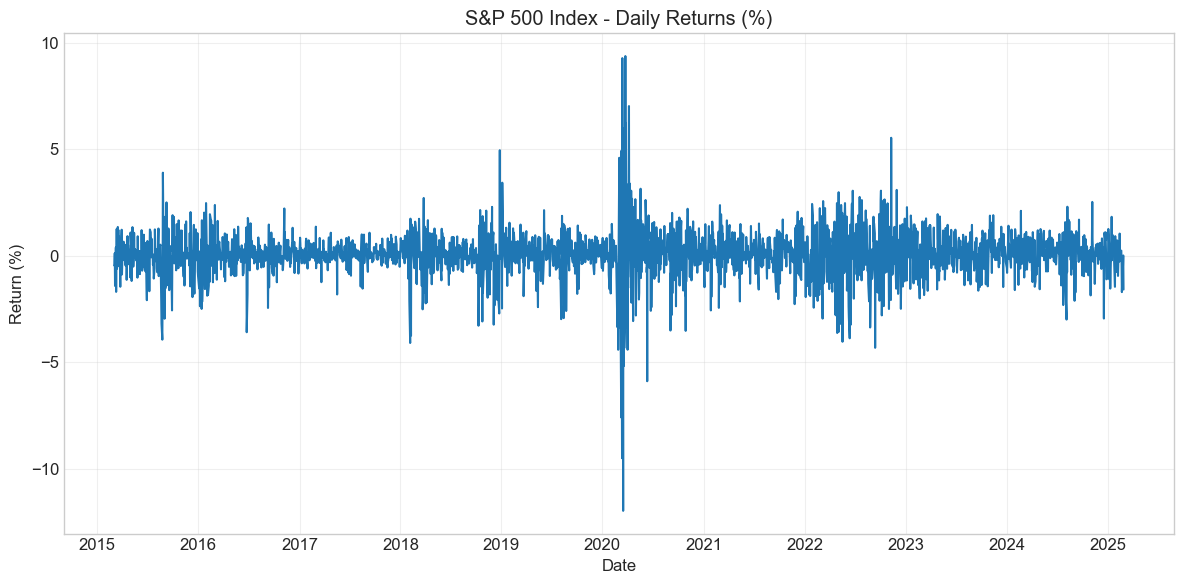

In [9]:
# Plot returns
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sp500_data.index, sp500_data['Returns'])
ax.set_title('S&P 500 Index - Daily Returns (%)')
ax.set_xlabel('Date')
ax.set_ylabel('Return (%)')
ax.grid(True, alpha=0.3)
plt.tight_layout()

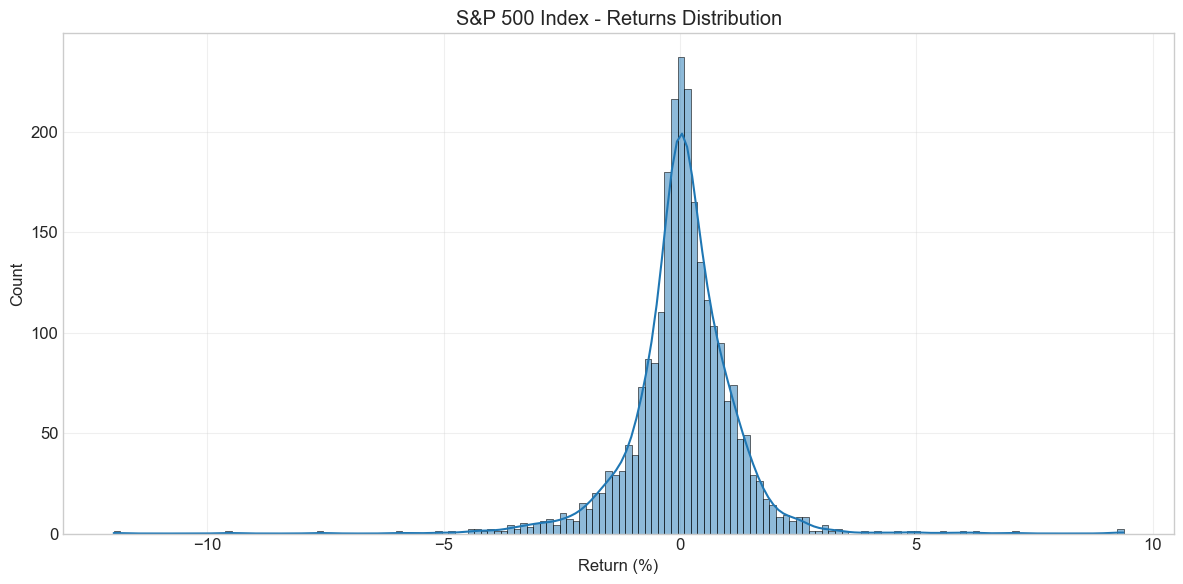

In [10]:
# Plot returns distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(sp500_data['Returns'].dropna(), kde=True, ax=ax)
ax.set_title('S&P 500 Index - Returns Distribution')
ax.set_xlabel('Return (%)')
ax.grid(True, alpha=0.3)
plt.tight_layout()

## 5. Time Series Analysis

In [11]:
# Check for stationarity with Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary (reject the null hypothesis)")
    else:
        print("Conclusion: The series is non-stationary (fail to reject the null hypothesis)")

# Test price series for stationarity
print("Stationarity Test for Closing Prices:")
adf_test(sp500_data['Close/Last'])

print("\nStationarity Test for Returns:")
adf_test(sp500_data['Returns'].dropna())

Stationarity Test for Closing Prices:
ADF Statistic: 0.3186
p-value: 0.9782
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Conclusion: The series is non-stationary (fail to reject the null hypothesis)

Stationarity Test for Returns:
ADF Statistic: -15.7739
p-value: 0.0000
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Conclusion: The series is stationary (reject the null hypothesis)


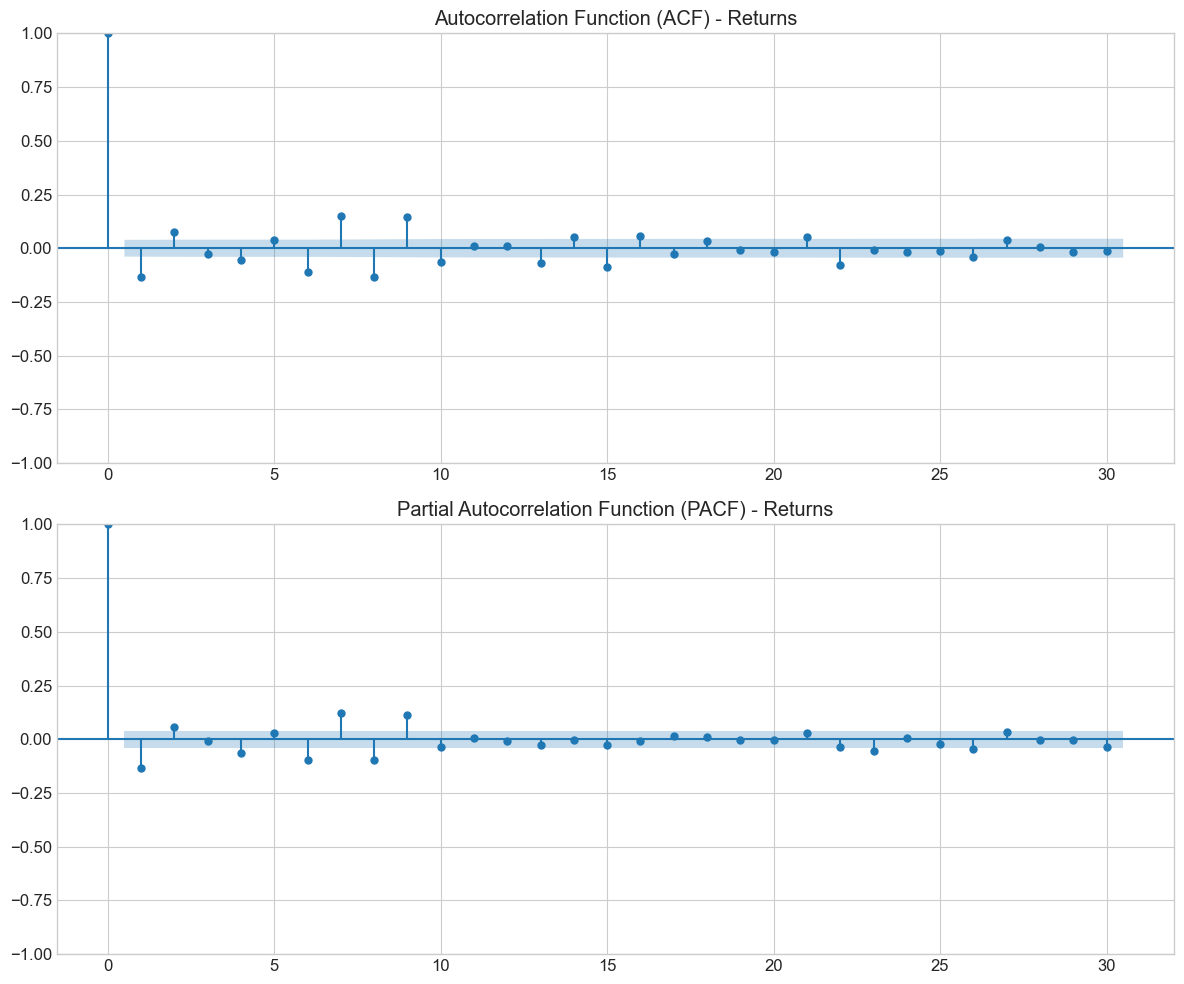

In [12]:
# Plot ACF and PACF for returns
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF
plot_acf(sp500_data['Returns'].dropna(), lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - Returns')

# PACF
plot_pacf(sp500_data['Returns'].dropna(), lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - Returns')

plt.tight_layout()

## 6. Volatility Clustering

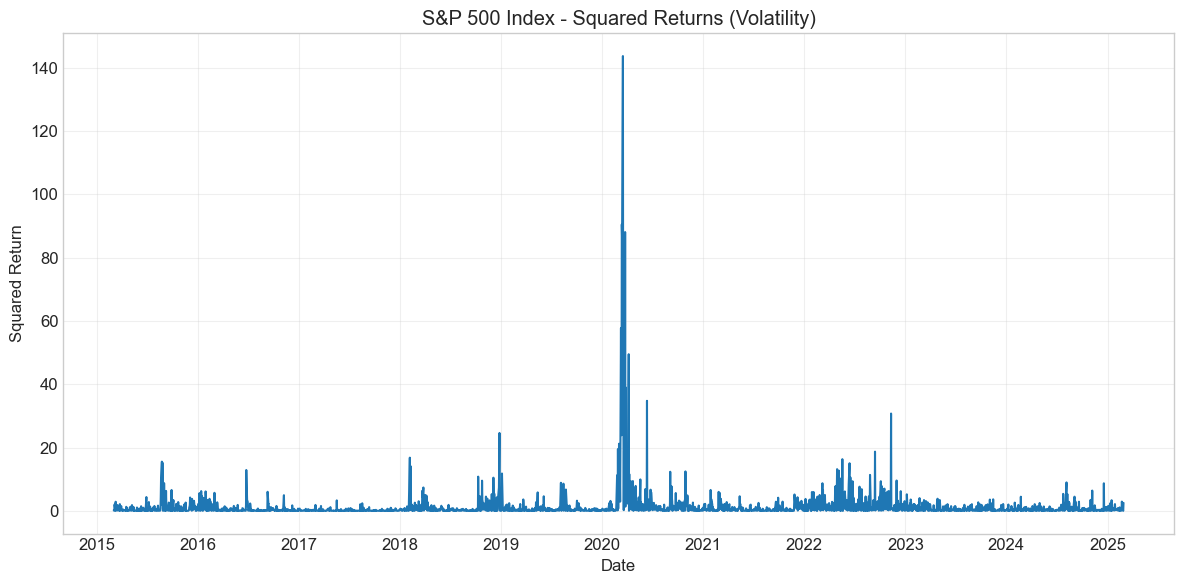

In [13]:
# Calculate squared returns for volatility analysis
sp500_data['Returns_Squared'] = sp500_data['Returns'] ** 2

# Plot squared returns to visualize volatility clustering
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sp500_data.index, sp500_data['Returns_Squared'])
ax.set_title('S&P 500 Index - Squared Returns (Volatility)')
ax.set_xlabel('Date')
ax.set_ylabel('Squared Return')
ax.grid(True, alpha=0.3)
plt.tight_layout()

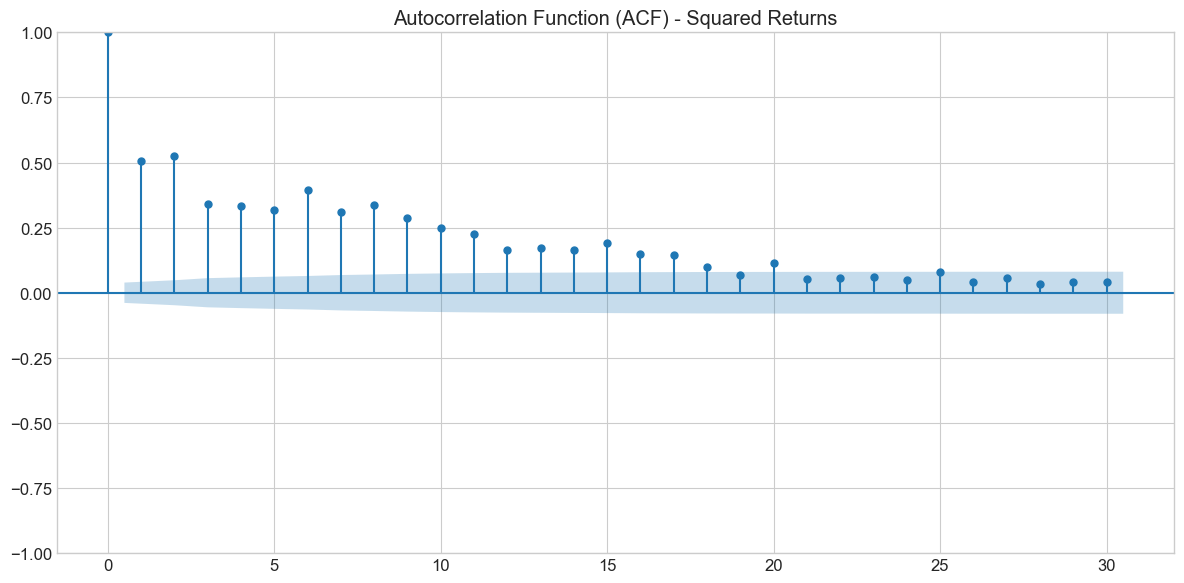

In [14]:
# Plot ACF of squared returns to detect volatility clustering
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(sp500_data['Returns_Squared'].dropna(), lags=30, ax=ax)
ax.set_title('Autocorrelation Function (ACF) - Squared Returns')
plt.tight_layout()

## 7. Prepare for Forecasting

In [15]:
# Extract the data for the forecast period
forecast_dates = pd.date_range(start='2025-02-21', end='2025-02-27', freq='B')
print(f"Forecast dates: {forecast_dates}")

# Extract actual values for the forecast period
forecast_actual = sp500_data.loc[forecast_dates, 'Close/Last']
print("\nActual values for forecast period:")
forecast_actual

Forecast dates: DatetimeIndex(['2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27'], dtype='datetime64[ns]', freq='B')

Actual values for forecast period:


2025-02-21    6013.13
2025-02-24    5983.25
2025-02-25    5955.25
2025-02-26    5956.06
2025-02-27    5861.57
Name: Close/Last, dtype: float64

In [16]:
# Split data into training and testing sets
train_data, test_data = train_test_split(sp500_data, test_size=5)

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Display the last 5 rows of training data
print("\nLast 5 rows of training data:")
train_data.tail()

Training data shape: (2516, 7)
Testing data shape: (5, 7)

Last 5 rows of training data:


,Close/Last,Open,High,Low,Daily_Range,Returns,Returns_Squared
Date,,,,,,,
2025-02-13,6115.07,6060.59,6116.91,6050.95,65.96,1.042636,1.087089
2025-02-14,6114.63,6115.52,6127.47,6107.62,19.85,-0.007195,0.000052
2025-02-18,6129.58,6121.60,6129.63,6099.51,30.12,0.244496,0.059778
2025-02-19,6144.15,6117.76,6147.43,6111.15,36.28,0.237700,0.056501
2025-02-20,6117.52,6134.50,6134.50,6084.59,49.91,-0.433420,0.187853


In [17]:
# Display testing data
print("Testing data:")
test_data

Testing data:


,Close/Last,Open,High,Low,Daily_Range,Returns,Returns_Squared
Date,,,,,,,
2025-02-21,6013.13,6114.10,6114.82,6008.56,106.26,-1.706410,2.911837
2025-02-24,5983.25,6026.69,6043.65,5977.83,65.82,-0.496913,0.246922
2025-02-25,5955.25,5982.73,5992.65,5908.49,84.16,-0.467973,0.218999
2025-02-26,5956.06,5970.87,6009.82,5932.69,77.13,0.013601,0.000185
2025-02-27,5861.57,5981.88,5993.69,5858.78,134.91,-1.586451,2.516828


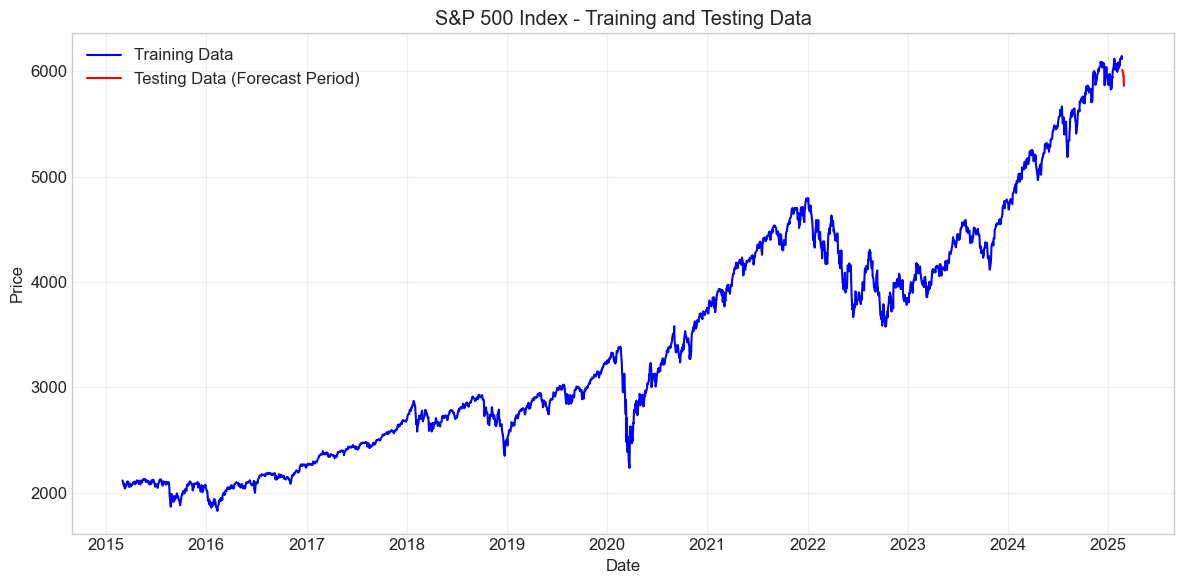

In [18]:
# Plot training and testing data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_data.index, train_data['Close/Last'], 'b-', label='Training Data')
ax.plot(test_data.index, test_data['Close/Last'], 'r-', label='Testing Data (Forecast Period)')
ax.set_title('S&P 500 Index - Training and Testing Data')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()

## 8. Save Processed Data

In [19]:
# Save processed data for use in other notebooks
import os

# Create processed data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save full dataset
sp500_data.to_csv('../data/processed/sp500_processed.csv')

# Save training and testing sets
train_data.to_csv('../data/processed/sp500_train.csv')
test_data.to_csv('../data/processed/sp500_test.csv')

print("Data saved successfully!")

Data saved successfully!


## 9. Summary and Observations

**Key Observations:**

1. **Data Overview**: The S&P 500 dataset spans from February 24, 2020, to February 27, 2025, providing 5 years of historical data.

2. **Stationarity**: 
   - The closing price series is non-stationary, as expected for financial time series.
   - The returns series is stationary, making it suitable for ARIMA modeling.

3. **Volatility Clustering**: 
   - The squared returns exhibit significant autocorrelation, indicating volatility clustering.
   - This makes GARCH modeling an appropriate choice for capturing the time-varying volatility.

4. **Forecast Period**: 
   - We will forecast the S&P 500 closing prices for the period from February 24 to February 28, 2025.
   - The actual values for this period are available in our dataset, which will allow us to evaluate forecast accuracy.

**Next Steps:**

1. Develop an ARIMA model to forecast the closing prices.
2. Implement a GARCH model to capture volatility patterns.
3. Compare and evaluate the forecasts from both models.
